In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Feature Engineering

In [2]:
data=pd.read_csv("anxiety_depression_data.csv")
data.head(5)

,Age,Gender,Education_Level,Employment_Status,Sleep_Hours,Physical_Activity_Hrs,Social_Support_Score,Anxiety_Score,Depression_Score,Stress_Level,...,Chronic_Illnesses,Medication_Use,Therapy,Meditation,Substance_Use,Financial_Stress,Work_Stress,Self_Esteem_Score,Life_Satisfaction_Score,Loneliness_Score
0,56,Male,Bachelor's,Unemployed,6.0,0.4,3,4,2,9,...,0,NaN,0,1,NaN,4,3,7,5,1
1,69,Female,Bachelor's,Retired,8.8,2.8,6,18,7,6,...,0,NaN,1,0,NaN,1,4,7,4,6
2,46,Female,Master's,Employed,5.3,1.6,5,5,13,8,...,0,NaN,0,1,NaN,8,7,8,1,1
3,32,Female,High School,Unemployed,8.8,0.5,4,6,3,4,...,1,NaN,0,0,NaN,7,4,8,4,4
4,60,Female,Bachelor's,Retired,7.2,0.7,2,7,15,3,...,0,NaN,1,1,Frequent,8,9,5,7,7


In [3]:
data.isnull().sum()

Age                                0
Gender                             0
Education_Level                    0
Employment_Status                  0
Sleep_Hours                        0
Physical_Activity_Hrs              0
Social_Support_Score               0
Anxiety_Score                      0
Depression_Score                   0
Stress_Level                       0
Family_History_Mental_Illness      0
Chronic_Illnesses                  0
Medication_Use                   747
Therapy                            0
Meditation                         0
Substance_Use                    834
Financial_Stress                   0
Work_Stress                        0
Self_Esteem_Score                  0
Life_Satisfaction_Score            0
Loneliness_Score                   0
dtype: int64

In [4]:
data=data.drop(["Medication_Use","Substance_Use"],axis=1)

In [5]:
data.isnull().sum()

Age                              0
Gender                           0
Education_Level                  0
Employment_Status                0
Sleep_Hours                      0
Physical_Activity_Hrs            0
Social_Support_Score             0
Anxiety_Score                    0
Depression_Score                 0
Stress_Level                     0
Family_History_Mental_Illness    0
Chronic_Illnesses                0
Therapy                          0
Meditation                       0
Financial_Stress                 0
Work_Stress                      0
Self_Esteem_Score                0
Life_Satisfaction_Score          0
Loneliness_Score                 0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            1200 non-null   int64  
 1   Gender                         1200 non-null   object 
 2   Education_Level                1200 non-null   object 
 3   Employment_Status              1200 non-null   object 
 4   Sleep_Hours                    1200 non-null   float64
 5   Physical_Activity_Hrs          1200 non-null   float64
 6   Social_Support_Score           1200 non-null   int64  
 7   Anxiety_Score                  1200 non-null   int64  
 8   Depression_Score               1200 non-null   int64  
 9   Stress_Level                   1200 non-null   int64  
 10  Family_History_Mental_Illness  1200 non-null   int64  
 11  Chronic_Illnesses              1200 non-null   int64  
 12  Therapy                        1200 non-null   i

In [7]:
data.duplicated().sum()

0

In [8]:
ss=StandardScaler()
le=LabelEncoder()

In [9]:
data["Gender"]=le.fit_transform(data["Gender"])
data["Education_Level"]=le.fit_transform(data["Education_Level"])
data["Employment_Status"]=le.fit_transform(data["Employment_Status"])

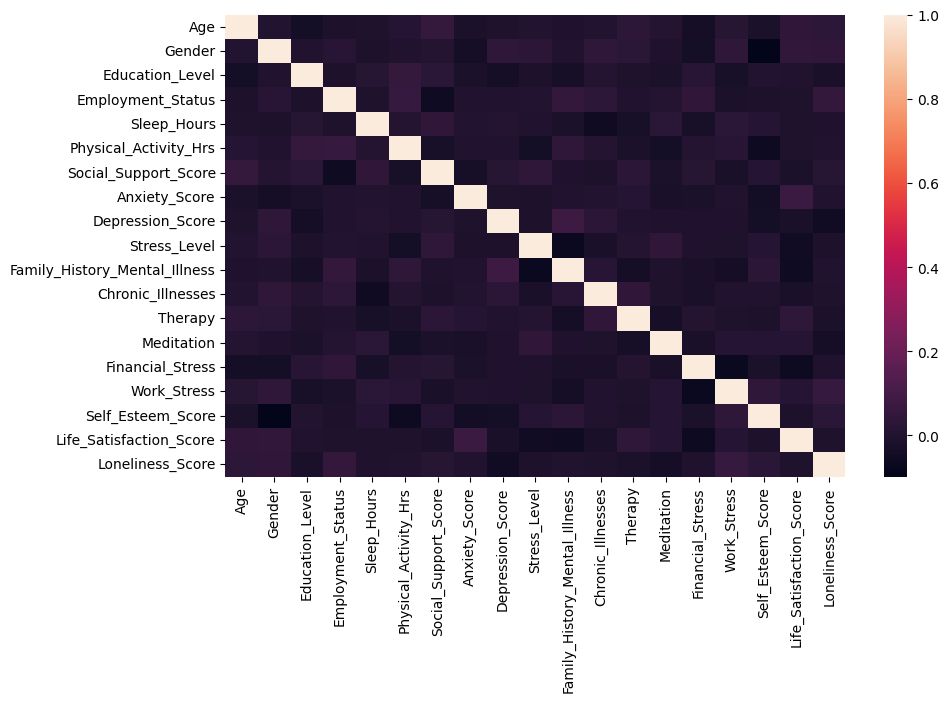

In [10]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr())
plt.show()

In [11]:
x=data.drop(["Stress_Level"],axis=1)
y=data["Stress_Level"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

# Classifiers

In [12]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier()
}

# Result

In [13]:
results = {}
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"{name} Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))
    print("-" * 50)

Logistic Regression Accuracy: 0.1000
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        27
           2       0.03      0.05      0.03        21
           3       0.14      0.20      0.17        20
           4       0.14      0.15      0.14        33
           5       0.04      0.03      0.04        30
           6       0.13      0.13      0.13        31
           7       0.10      0.07      0.09        27
           8       0.15      0.25      0.18        24
           9       0.12      0.04      0.06        27

    accuracy                           0.10       240
   macro avg       0.09      0.10      0.09       240
weighted avg       0.09      0.10      0.09       240

--------------------------------------------------
Random Forest Accuracy: 0.1167
              precision    recall  f1-score   support

           1       0.14      0.11      0.12        27
           2       0.05      0.10      0.07        21
           3 

In [14]:
# 

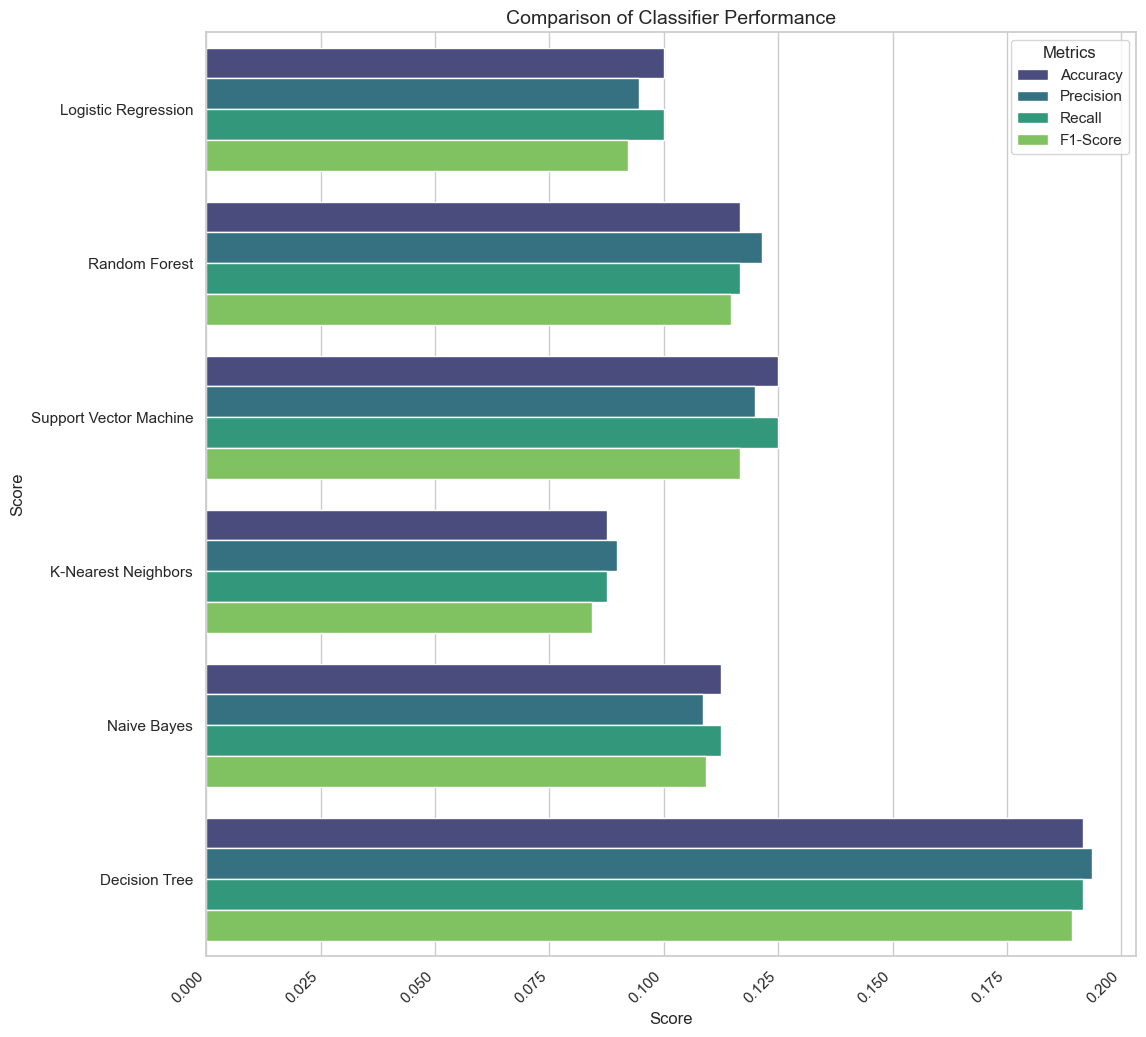

In [16]:
results = {
    "Classifier": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": []
}

for model_name, model in models.items():
    y_pred = model.predict(x_test)

    results["Classifier"].append(model_name)
    results["Accuracy"].append(accuracy_score(y_test, y_pred))
    results["Precision"].append(precision_score(y_test, y_pred, average='weighted'))
    results["Recall"].append(recall_score(y_test, y_pred, average='weighted'))
    results["F1-Score"].append(f1_score(y_test, y_pred, average='weighted'))

df_results = pd.DataFrame(results)
df_melted = df_results.melt(id_vars="Classifier", var_name="Metric", value_name="Score")
sns.set(style="whitegrid")
plt.figure(figsize=(12, 12))
sns.barplot(y="Classifier", x="Score", hue="Metric", data=df_melted, palette="viridis")

plt.title("Comparison of Classifier Performance", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Score")
plt.legend(title="Metrics")

plt.show()

# Thank you please UPVOTE ! 